In [1]:
%matplotlib inline

In [3]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.6 MB 18.2 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 13.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.6 MB 10.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 8.8 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 7.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Numerical computation
import numpy as np  # The Python numerical algebra package

# Data manipulation
import pandas as pd  # For working with data frames

# Visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # Another package for plotting

# Statistical modeling
import statsmodels.api as sm  # Package for statistical modelling
import scipy.stats as stats  # Another package for statistical modelling

# Preprocessing
from sklearn.preprocessing import LabelEncoder  # Python package for machine learning models

# Utilities
import copy  # For deep/shallow copying of Python objects


In [5]:
sns.set()

In [6]:
df = pd.read_csv('insurance.csv')  # read the data as a data frame


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [11]:
df['children'].value_counts().sort_values()


children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [12]:
df['age'].value_counts().sort_values()


age
64    22
63    23
62    23
60    23
61    23
59    25
35    25
37    25
39    25
36    25
38    25
58    25
32    26
33    26
57    26
55    26
34    26
56    26
29    27
30    27
41    27
31    27
44    27
43    27
42    27
40    27
54    28
28    28
24    28
25    28
49    28
23    28
26    28
27    28
21    28
22    28
53    28
46    29
52    29
48    29
45    29
20    29
50    29
47    29
51    29
19    68
18    69
Name: count, dtype: int64

In [13]:
# Mapping categorical values to numerical codes
clean_data = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
}

# Create a copy of the original dataframe
data_copy = df.copy()

# Replace categorical values with numerical values using the mapping
data_copy.replace(clean_data, inplace=True)

# View the first few rows to confirm changes
data_copy.head()


C:\Users\Senthil Kumar\AppData\Local\Temp\ipykernel_16732\745887292.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


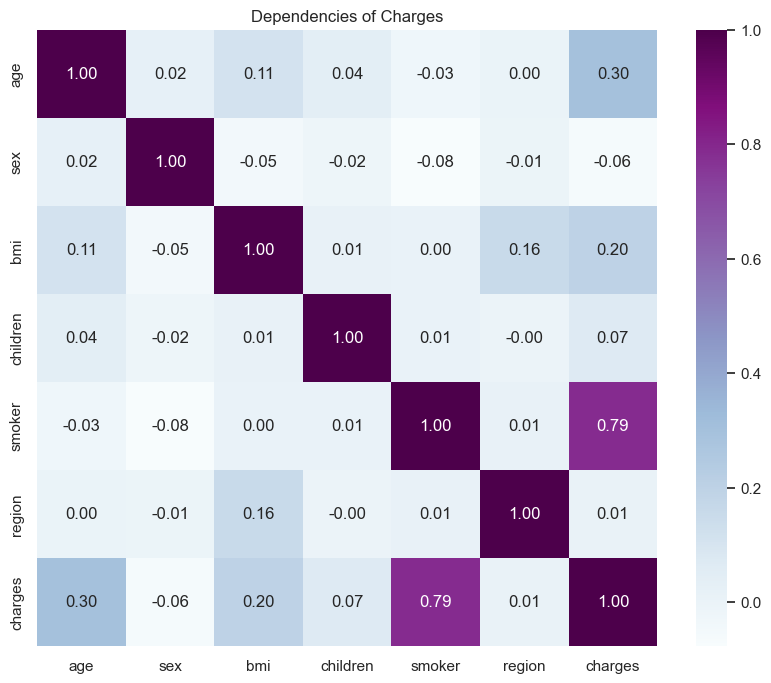

In [14]:
corr = data_copy.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='BuPu', annot=True, fmt=".2f", ax=ax)

plt.title("Dependencies of Charges")
plt.show()


In [15]:
print(data_copy['sex'].value_counts().sort_values())
print(data_copy['smoker'].value_counts().sort_values())
print(data_copy['region'].value_counts().sort_values())

sex
1    662
0    676
Name: count, dtype: int64
smoker
1     274
0    1064
Name: count, dtype: int64
region
1    324
3    325
0    325
2    364
Name: count, dtype: int64


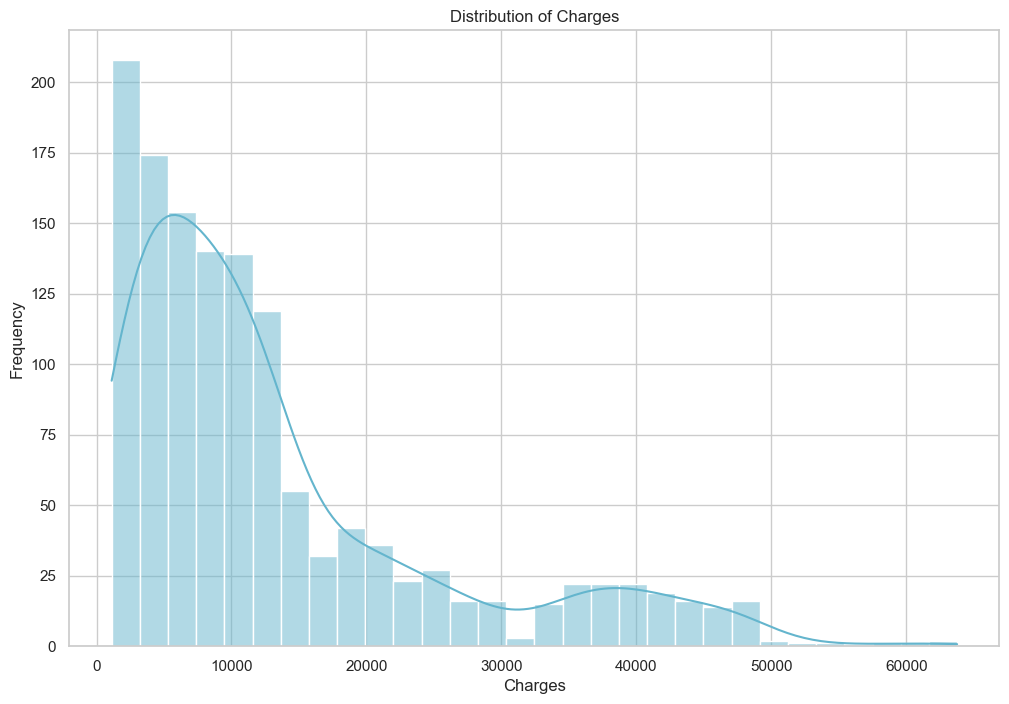

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot histogram with KDE
sns.histplot(df['charges'], kde=True, color='c', ax=ax)

plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.show()


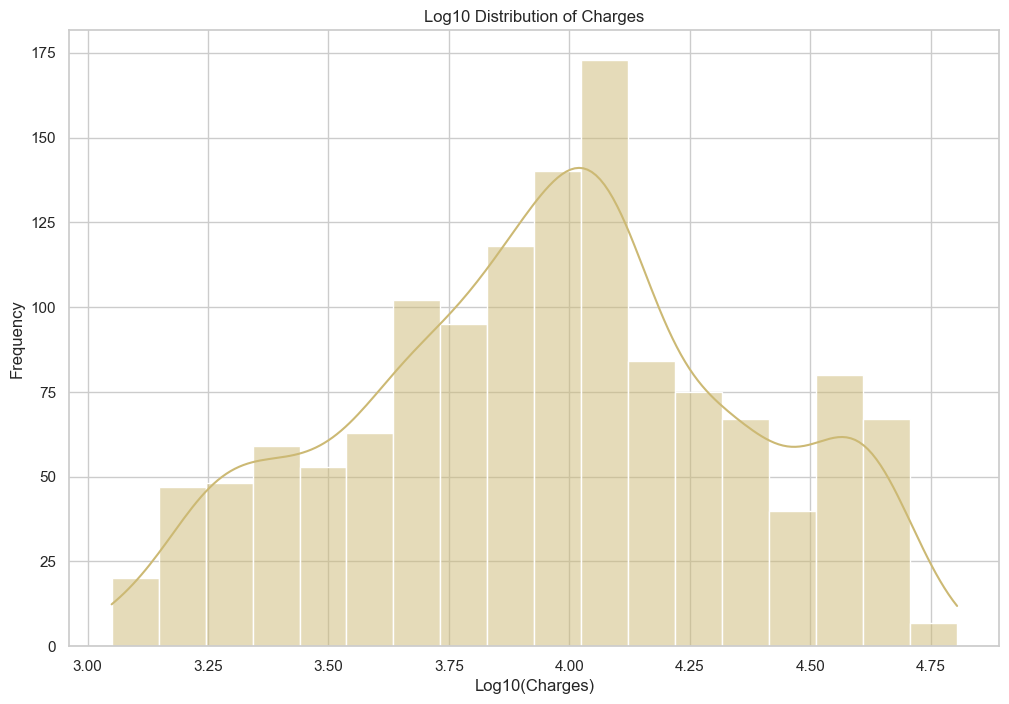

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.histplot(np.log10(df['charges']), kde=True, color='y', ax=ax)

plt.title('Log10 Distribution of Charges')
plt.xlabel('Log10(Charges)')
plt.ylabel('Frequency')

plt.show()


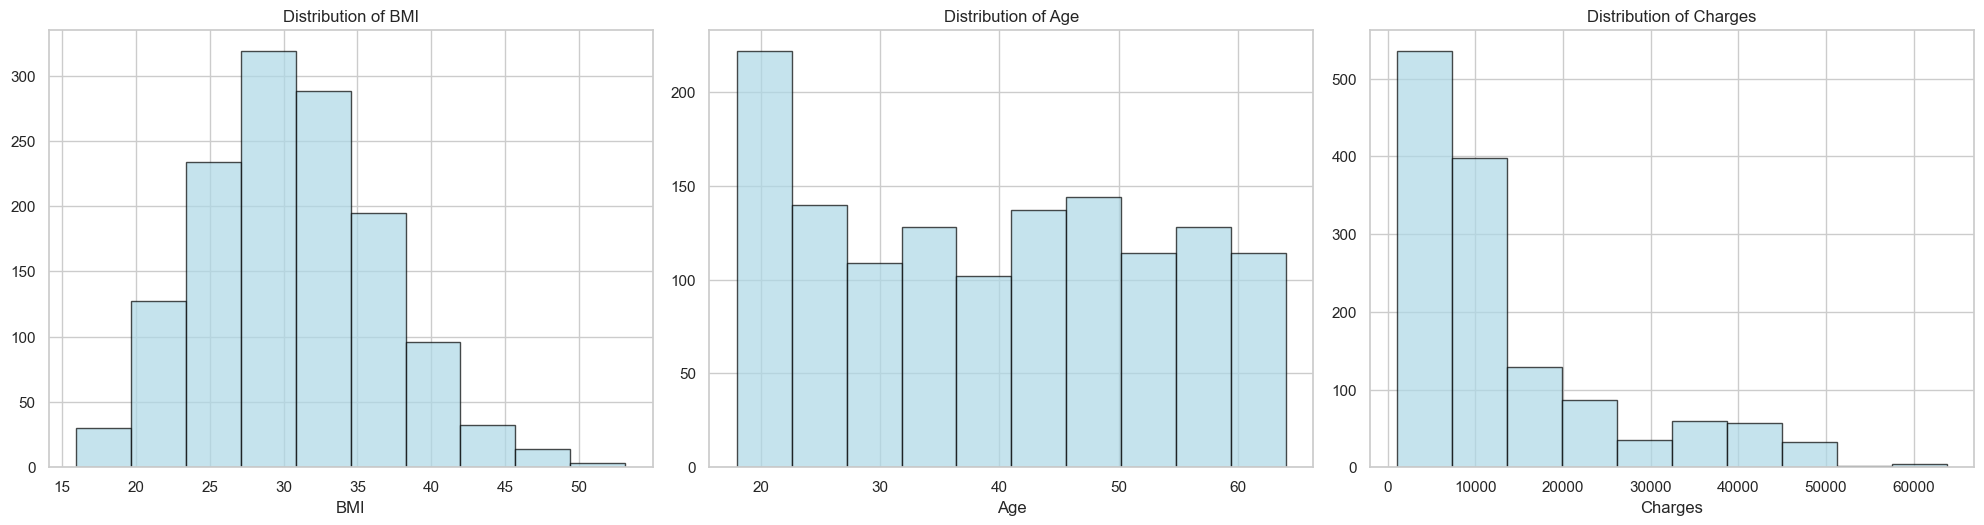

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
plt.hist(df['bmi'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('BMI')
plt.title('Distribution of BMI')

plt.subplot(3, 3, 2)
plt.hist(df['age'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.title('Distribution of Age')

plt.subplot(3, 3, 3)
plt.hist(df['charges'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Charges')
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()


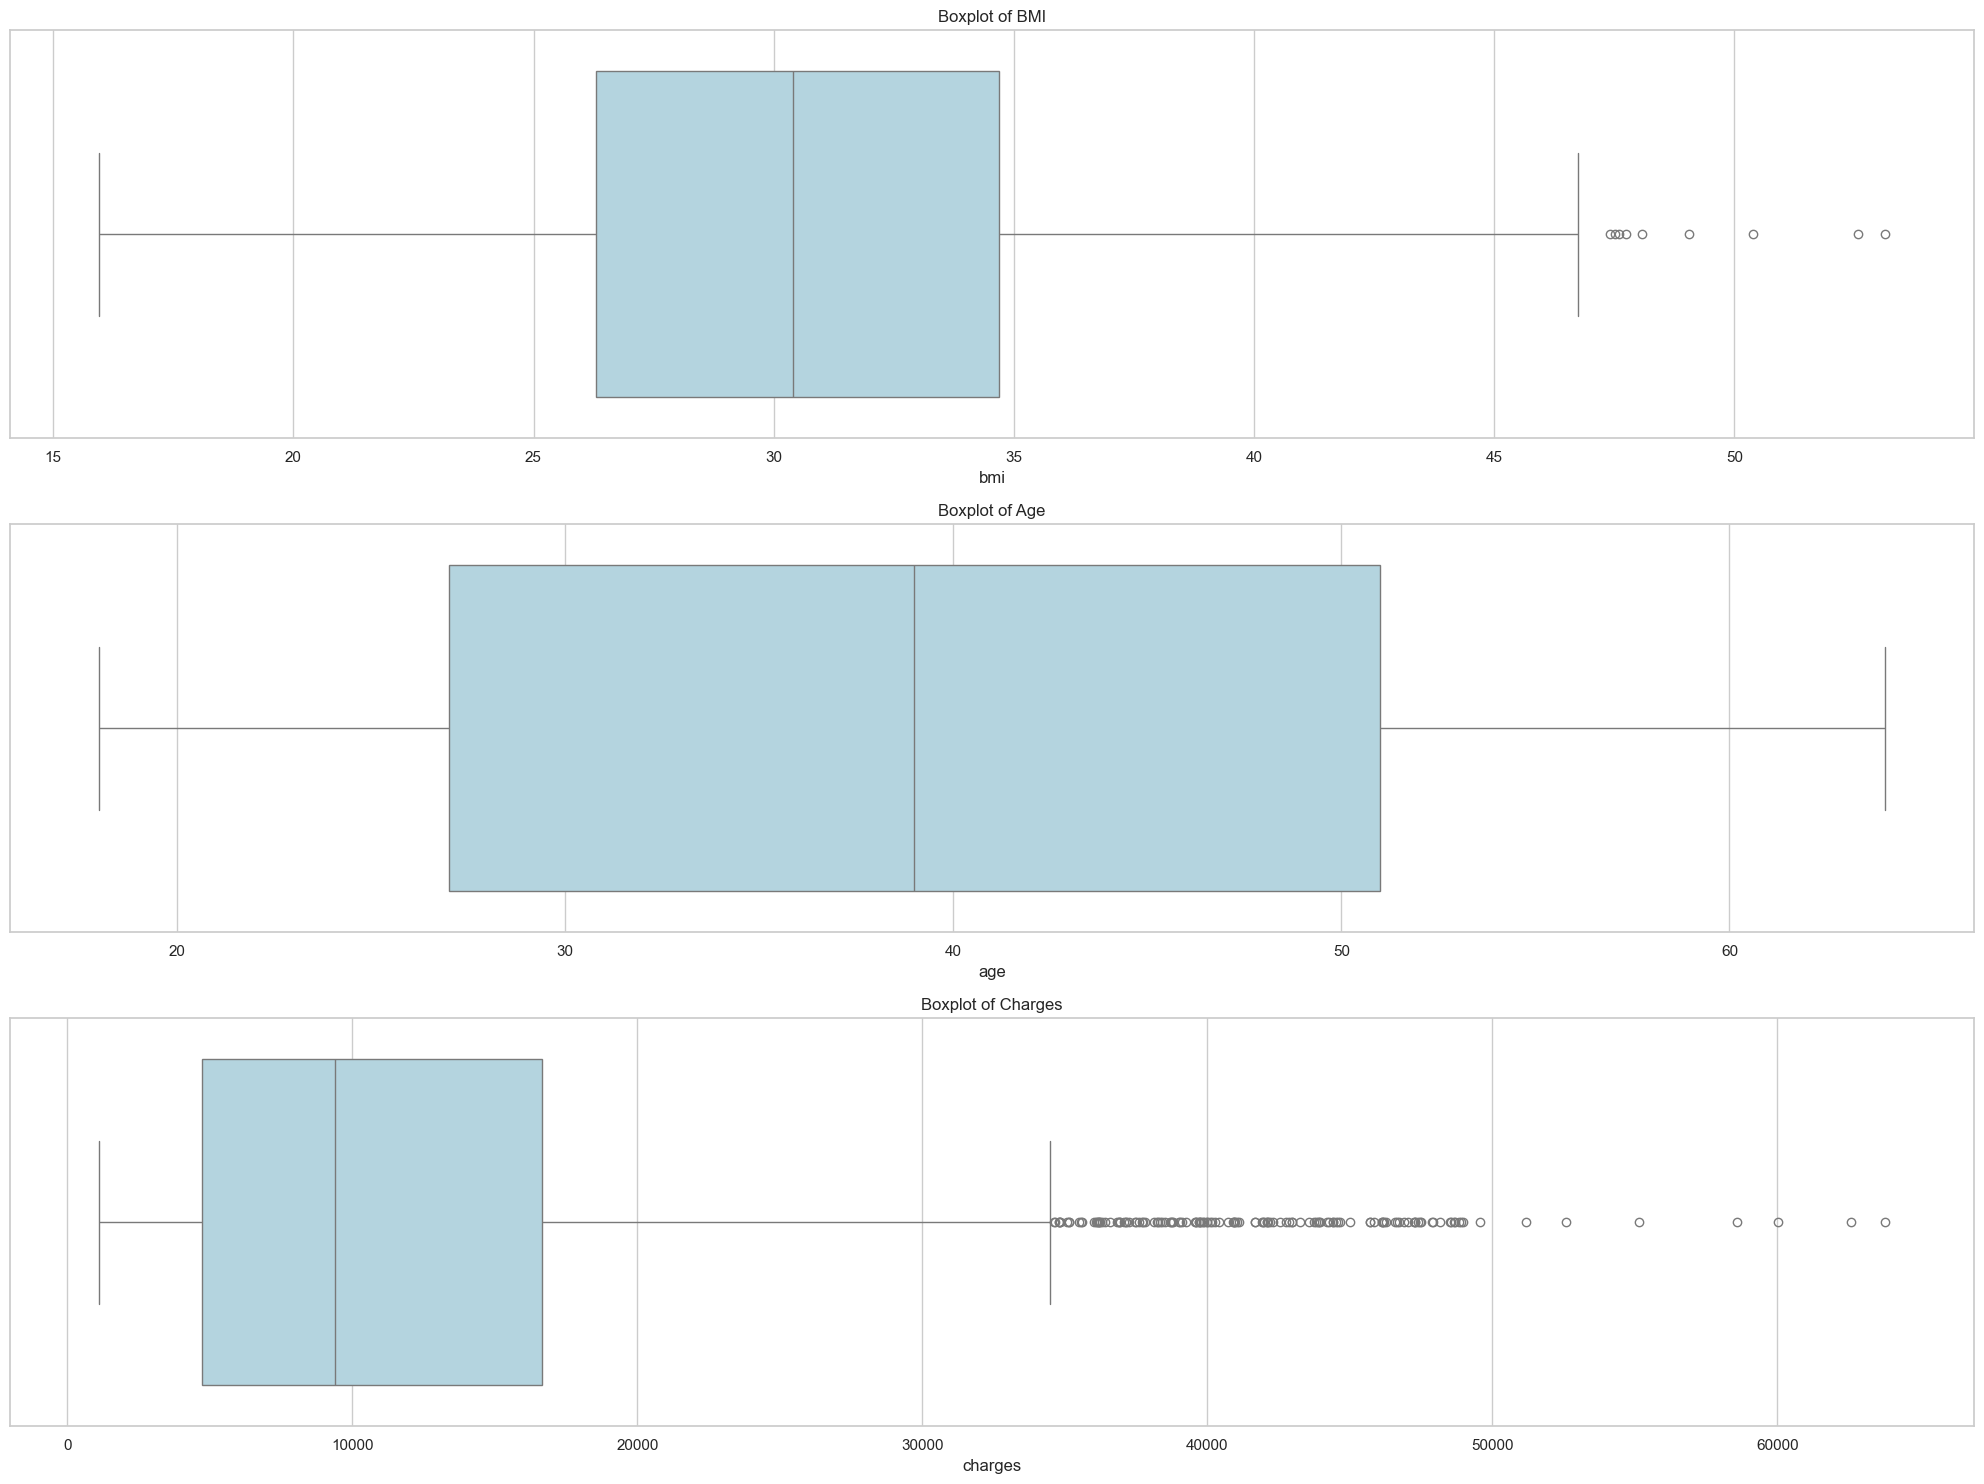

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x=df['bmi'], color='lightblue')
plt.title('Boxplot of BMI')

plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'], color='lightblue')
plt.title('Boxplot of Age')

plt.subplot(3, 1, 3)
sns.boxplot(x=df['charges'], color='lightblue')
plt.title('Boxplot of Charges')

plt.tight_layout()
plt.show()


In [20]:
print('Printing Skewness and Kurtosis for all columns\n')

for col in data_copy.columns:
    print(f'{col}: Skewness {data_copy[col].skew():.3f} and Kurtosis {data_copy[col].kurt():.3f}')


Printing Skewness and Kurtosis for all columns

age: Skewness 0.056 and Kurtosis -1.245
sex: Skewness 0.021 and Kurtosis -2.003
bmi: Skewness 0.284 and Kurtosis -0.051
children: Skewness 0.938 and Kurtosis 0.202
smoker: Skewness 1.465 and Kurtosis 0.146
region: Skewness -0.038 and Kurtosis -1.329
charges: Skewness 1.516 and Kurtosis 1.606


C:\Users\Senthil Kumar\AppData\Local\Temp\ipykernel_16732\3488017735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges_by_region.values, y=charges_by_region.index, palette='Blues', ax=ax)


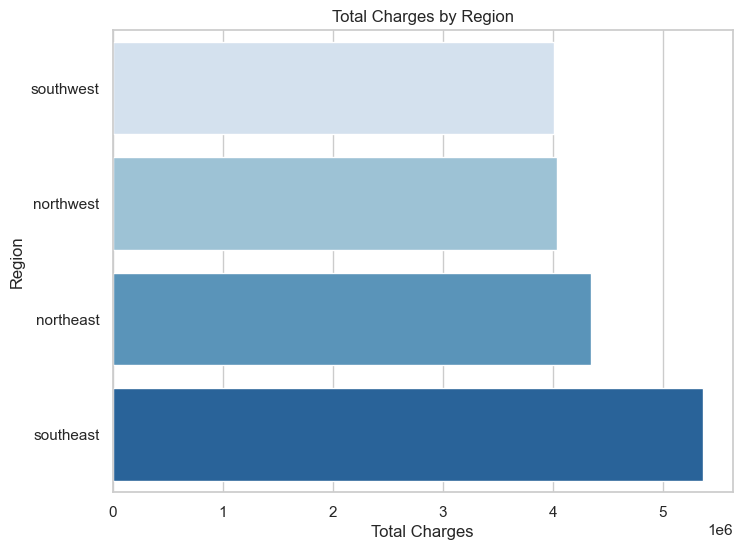

In [21]:
charges_by_region = df['charges'].groupby(df['region']).sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges_by_region.values, y=charges_by_region.index, palette='Blues', ax=ax)

plt.title('Total Charges by Region')
plt.xlabel('Total Charges')
plt.ylabel('Region')

plt.show()


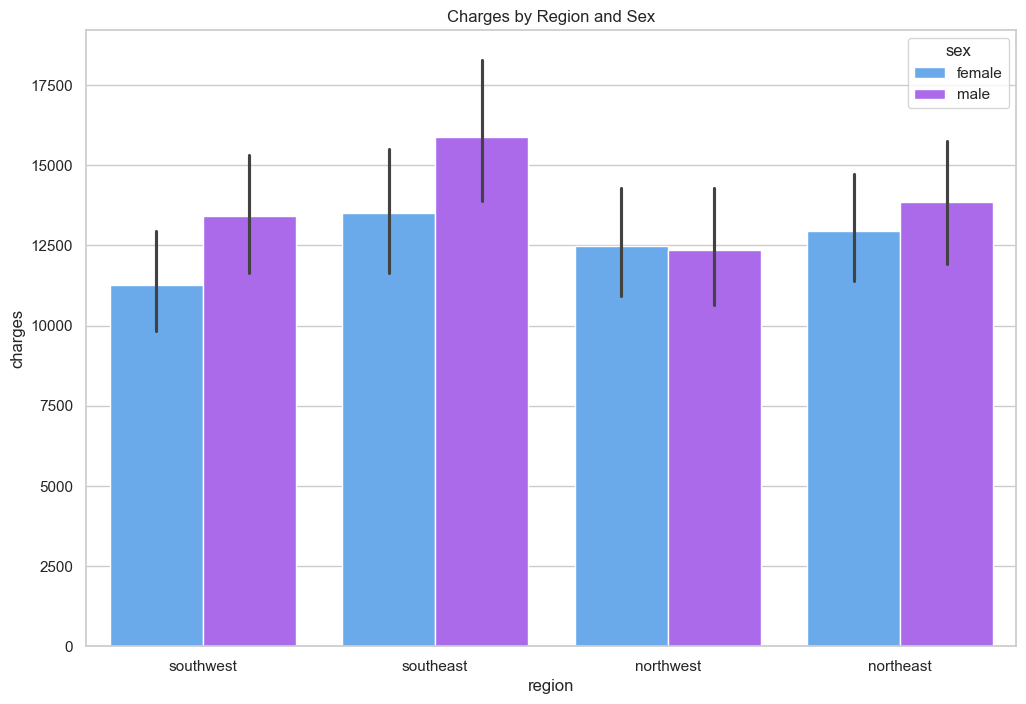

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool', ax=ax)
plt.title('Charges by Region and Sex')
plt.show()


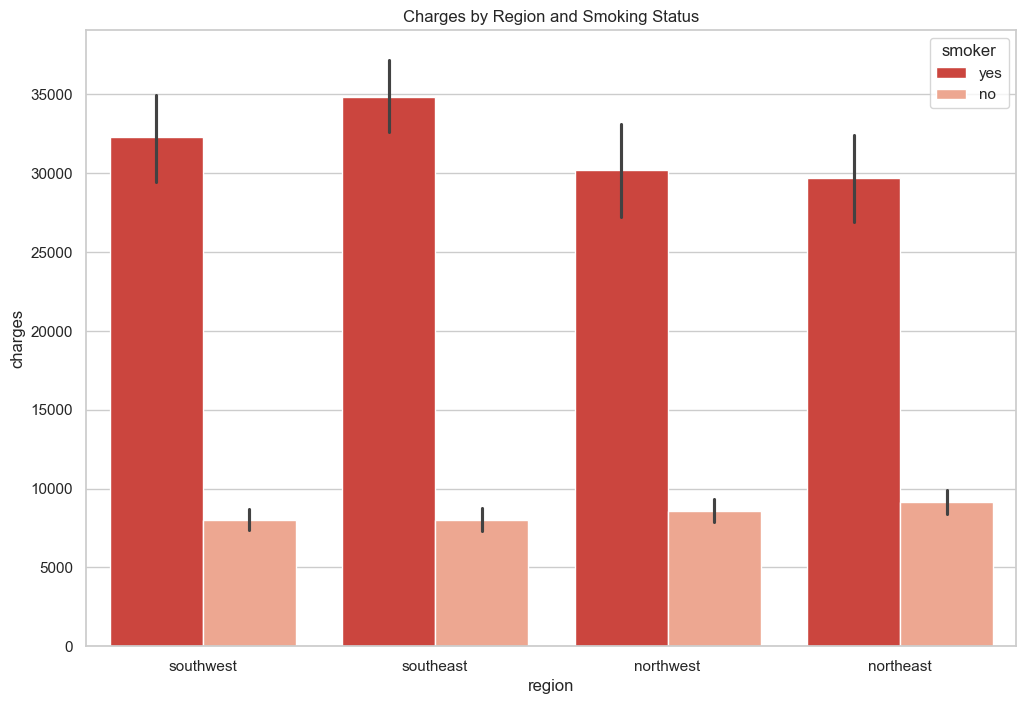

In [23]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r', ax=ax)
plt.title('Charges by Region and Smoking Status')
plt.show()


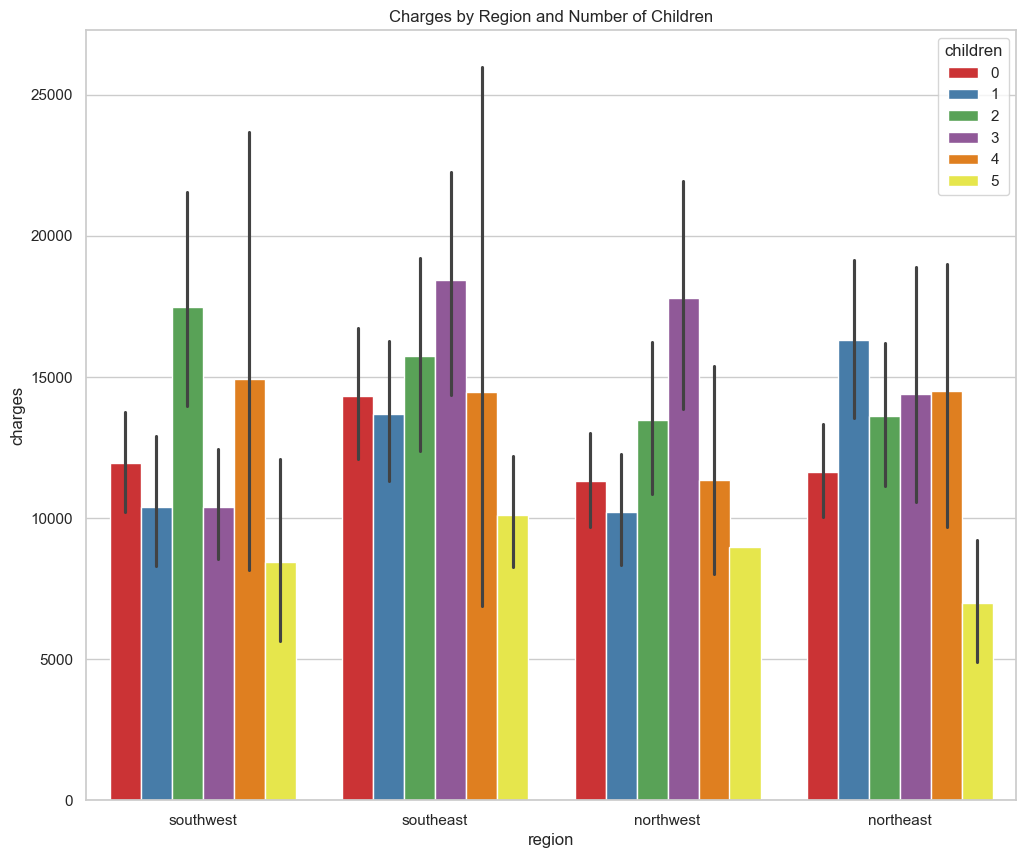

In [24]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1', ax=ax)
plt.title('Charges by Region and Number of Children')
plt.show()


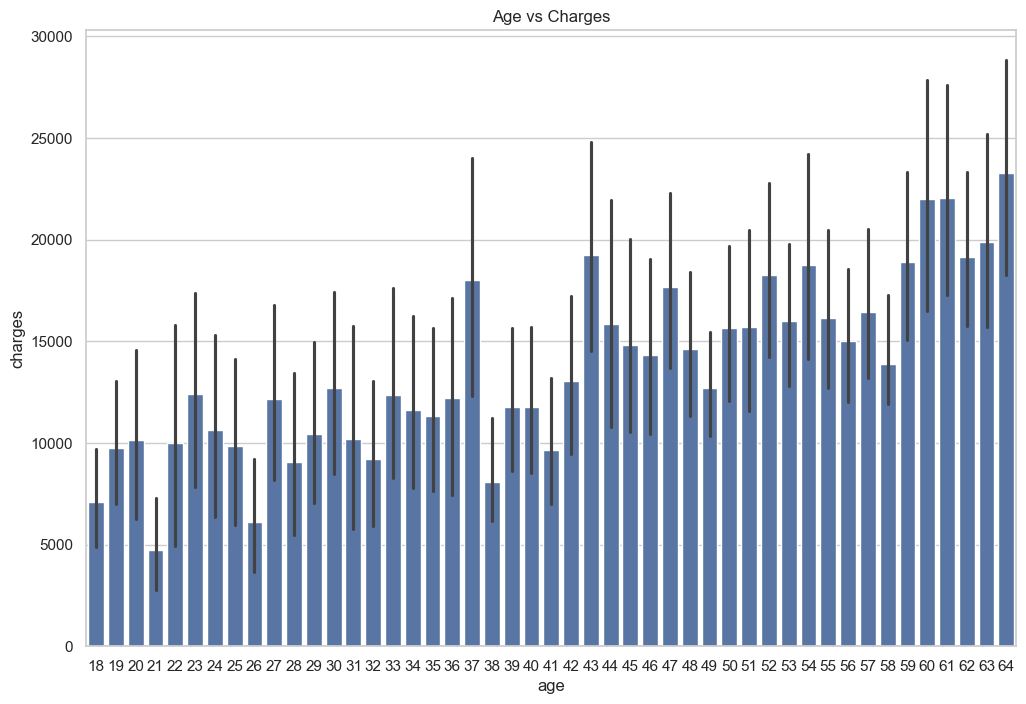

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

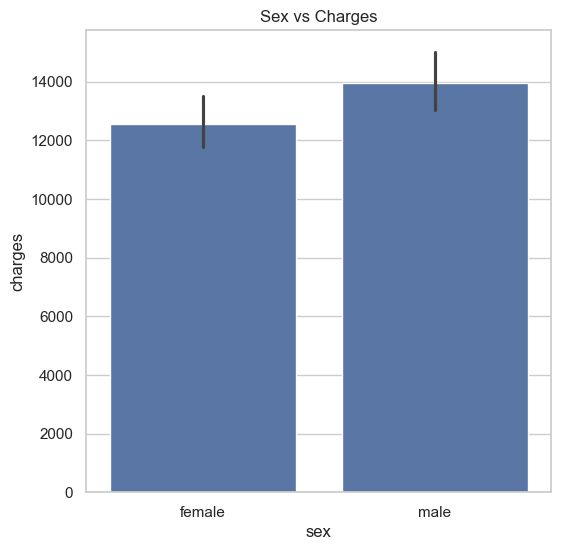

In [26]:
plt.figure(figsize=(6, 6))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.show()


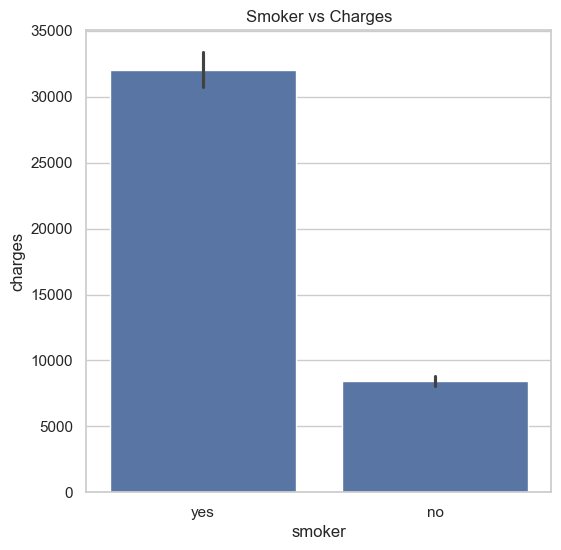

In [27]:
plt.figure(figsize=(6, 6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()


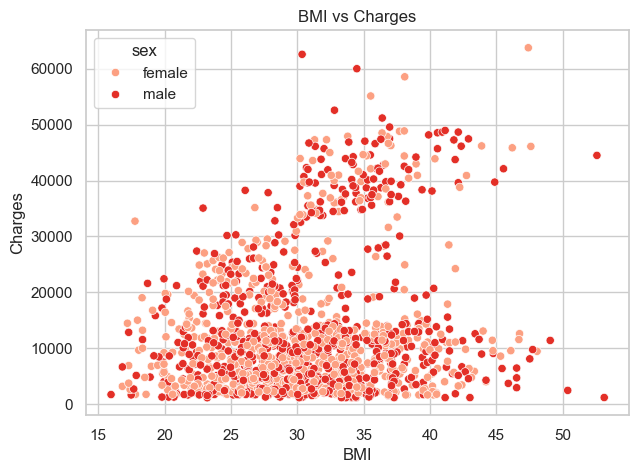

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df, palette='Reds')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


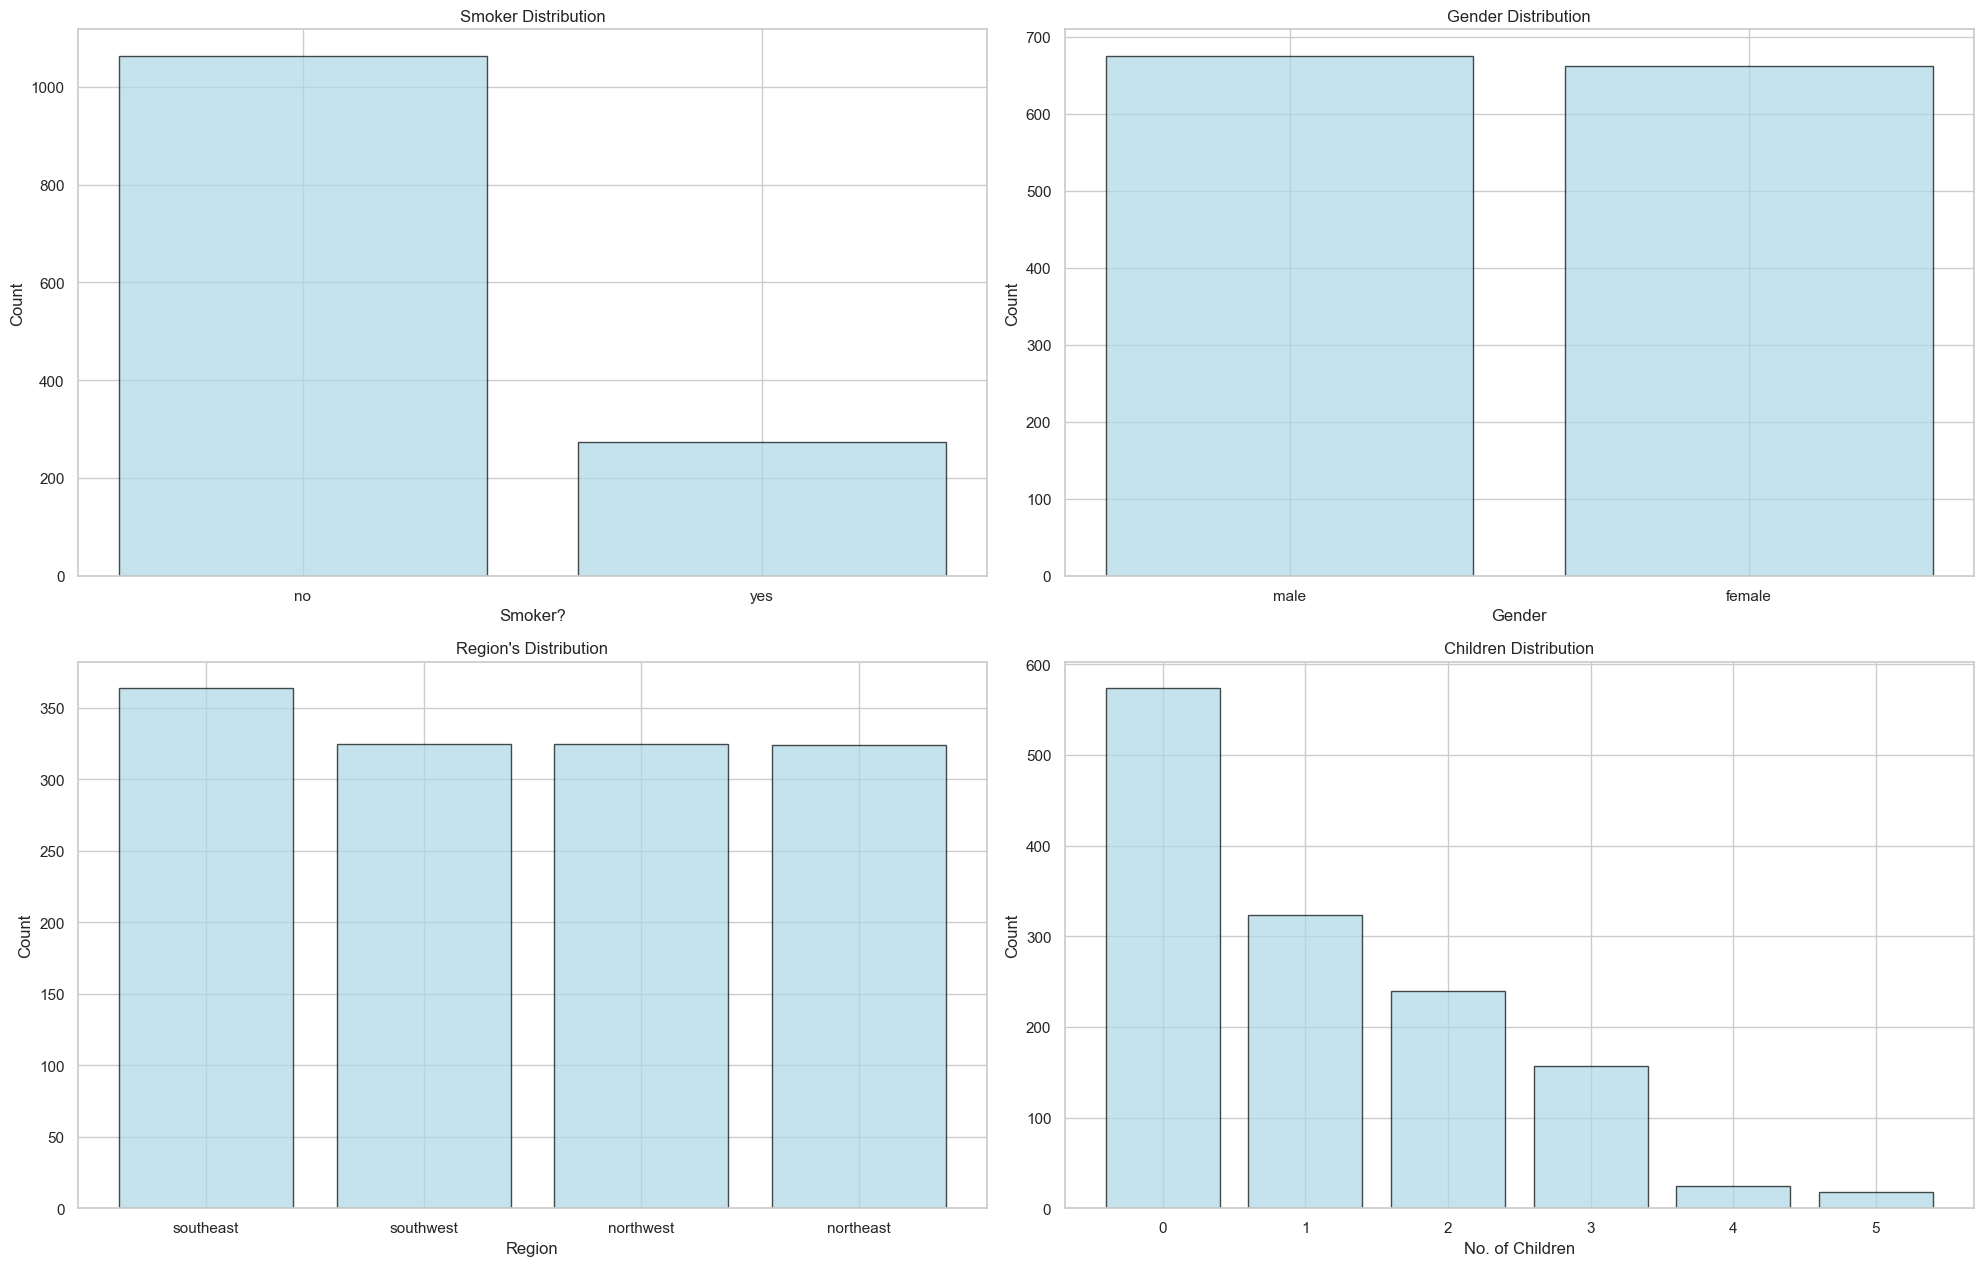

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

# Smoker distribution
x = df.smoker.value_counts().index
y = [df['smoker'].value_counts()[i] for i in x]
plt.subplot(4, 2, 1)
plt.bar(x, y, align='center', color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Smoker?')
plt.ylabel('Count')
plt.title('Smoker Distribution')

# Gender distribution
x1 = df.sex.value_counts().index
y1 = [df['sex'].value_counts()[j] for j in x1]
plt.subplot(4, 2, 2)
plt.bar(x1, y1, align='center', color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Region distribution
x2 = df.region.value_counts().index
y2 = [df['region'].value_counts()[k] for k in x2]
plt.subplot(4, 2, 3)
plt.bar(x2, y2, align='center', color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Region's Distribution")

# Children distribution
x3 = df.children.value_counts().index
y3 = [df['children'].value_counts()[l] for l in x3]
plt.subplot(4, 2, 4)
plt.bar(x3, y3, align='center', color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('No. of Children')
plt.ylabel('Count')
plt.title('Children Distribution')

plt.tight_layout()
plt.show()


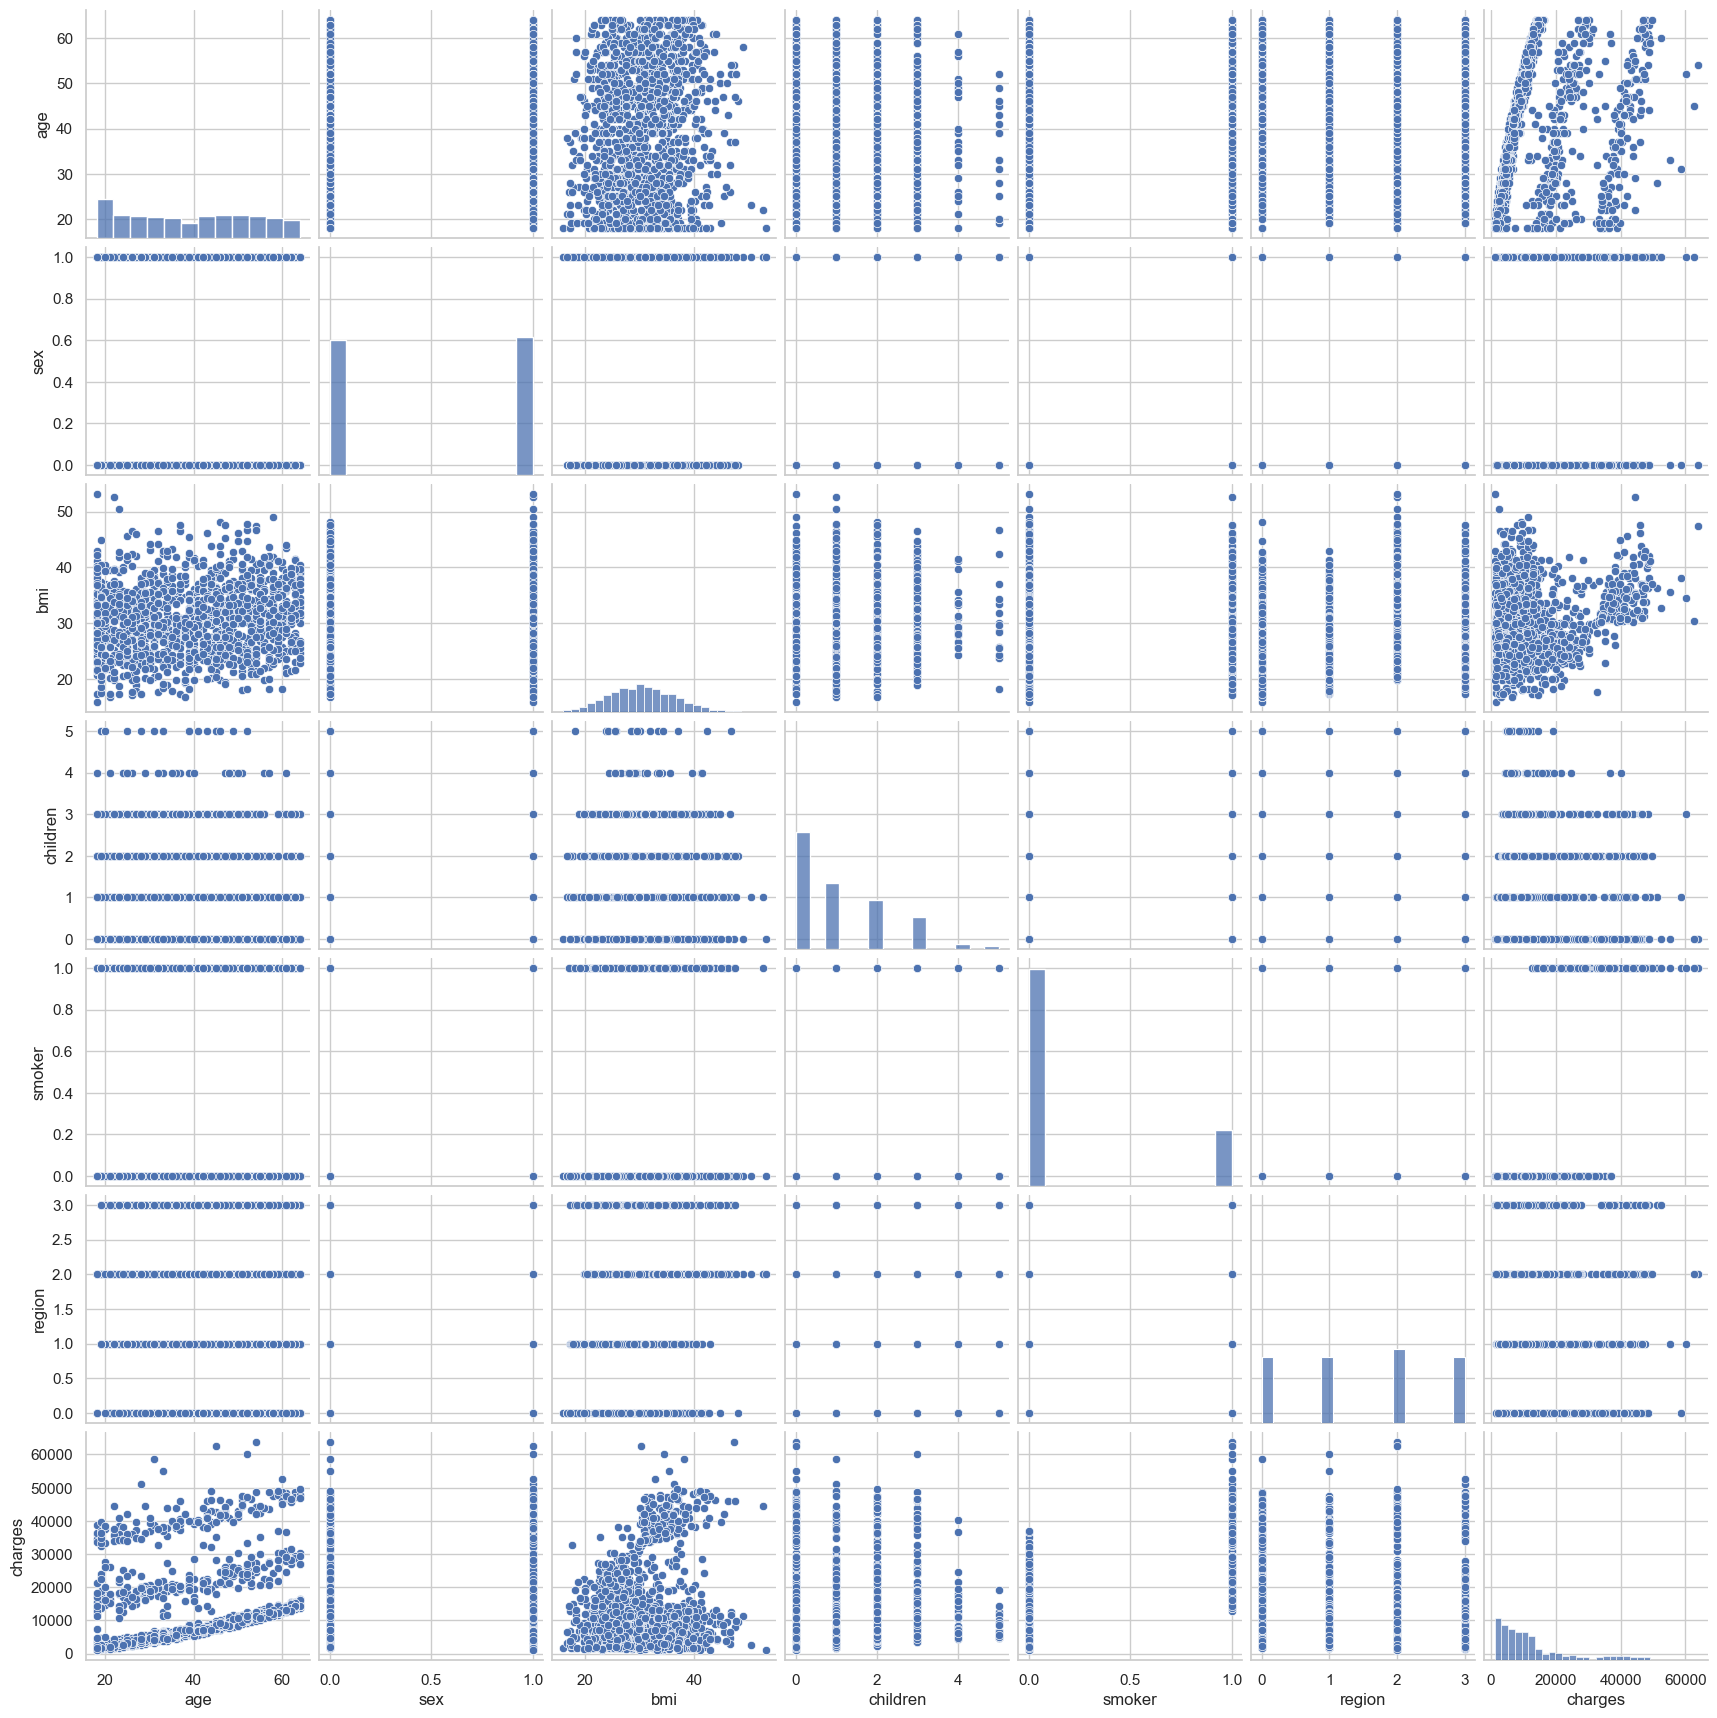

In [30]:
import copy
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Deep copy to avoid changing original dataframe
df_encoded = copy.deepcopy(df)

# Encode categorical columns: 'sex', 'smoker', 'region'
df_encoded.loc[:, ['sex', 'smoker', 'region']] = df_encoded.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

# Create pairplot to visualize pairwise relationships
sns.pairplot(df_encoded)
plt.show()


C:\Users\Senthil Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Senthil Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


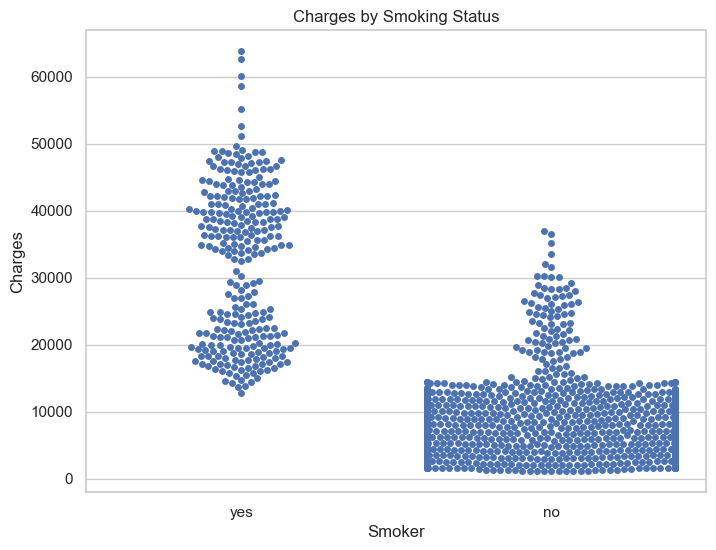

In [31]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()